# Look at data

In [77]:
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pyrepseq as prs

In [78]:
#move to correct directory
os.chdir('/Users/isabellasodi/Documents/UCL/PhD/CRUK_datathon_2025')

In [79]:
# load data
#tcr_data = pd.read_csv('input/tcrictionary_tabular.csv' )
tcr_data_raw = pd.read_csv('/Volumes/ritd-ag-project-rd0017-bmcha43/CRUK_datathon_2025/raw_data/tcrictionary_tabular.csv' )


## Pre-process

In [80]:
# pre-process

# only human
tcr_data = tcr_data_raw[ tcr_data_raw['TCR species'] == 'HomoSapiens'].copy()

# only with epitopes
tcr_data = tcr_data[ ~tcr_data['epitope'].isna()].copy()

print(tcr_data['epitope'].nunique())

# remove anything after a + for some epitopes with PTM info
tcr_data['epitope_full'] = tcr_data['epitope']
tcr_data['epitope'] = tcr_data['epitope_full'].str.split('+').str[0].str.strip()


2729


In [81]:
# remove any class 2
tcr_data = tcr_data[tcr_data['MHC class'] != 2].copy()
tcr_data

,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
0,PMID:36134660,multimer/tetramer,HomoSapiens,NaN,CASTTGRDNEQFF,NaN,TRBV2,GILGFVFTL,HLA-A*02:01,B2M,1.0,GILGFVFTL
1,PMID:34793243,multimer/tetramer,HomoSapiens,CAASAIGGKLIF,CASSFGDSYNEQFF,TRAV29/DV5,TRBV5-4,LLDDFVEII,HLA-A*02:01,B2M,1.0,LLDDFVEII
2,10xGenomics,multimer/tetramer,HomoSapiens,CAMREGVNDYKLSF,CASSLSGTGIQPQHF,NaN,NaN,AVFDRKSDAK,HLA-A*11:01,B2M,1.0,AVFDRKSDAK
3,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSAYEQYF,NaN,TRBV6-5,APKEIIFLEGETL,NaN,B2M,1.0,APKEIIFLEGETL
4,PMID:32184241,multimer/tetramer,HomoSapiens,NaN,CASSSPGAAETQYF,NaN,TRBV6-1,YVLDHLIVV,HLA-A*02:01,B2M,1.0,YVLDHLIVV
...,...,...,...,...,...,...,...,...,...,...,...,...
290873,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLAKGGGYTF,NaN,TRBV27,QLMCQPILLL,NaN,B2M,1.0,QLMCQPILLL
290874,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLLSVQETQYF,NaN,TRBV28,APHGVVFLHVTYV,NaN,B2M,1.0,APHGVVFLHVTYV
290875,PMID:28423320,multimer/tetramer,HomoSapiens,NaN,CSVDKGGPEAFF,NaN,TRBV29-1,NLVPMVATV,HLA-A*02:01,B2M,1.0,NLVPMVATV
290876,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSSSGGGISPLHF,NaN,TRBV7-8,LITLATCELYHYQECV,NaN,B2M,1.0,LITLATCELYHYQECV


In [82]:
# check how many will be lost from no MHC data
missing_mhc = tcr_data[tcr_data['MHC class'].isna()]
print( missing_mhc['epitope'].nunique() )
missing_mhc

262


,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
52,PMID:34006597,3H-thymidine,HomoSapiens,NaN,CASSRHPPSLAGVMYEQYF,NaN,TRBV6-5*01,RFASVYAWNRKRISNCVADY,NaN,NaN,NaN,RFASVYAWNRKRISNCVADY
81,PMID:30737354,multimer/tetramer,HomoSapiens,NaN,CASSTGESDTQYF,NaN,TRBV6-4,RTQSPRRR,NaN,NaN,NaN,RTQSPRRR
137,PMID:22942431,3H-thymidine,HomoSapiens,CAASRSTGGFKTIF,CSAKYVNTEAFF,TRAV13-1*02,TRBV20-1,VDSITEVECFLTPEA,NaN,NaN,NaN,VDSITEVECFLTPEA
140,PMID:31501610,3H-thymidine,HomoSapiens,NaN,CASGFTDTQYF,NaN,TRBV2,GKAPRLLIHYTSALQPGI,NaN,NaN,NaN,GKAPRLLIHYTSALQPGI
152,PMID:34061349,ELISA,HomoSapiens,NaN,CASSTRGHNTGELFF,NaN,TRBV5-1,NCTFEYVSQPFLMDL,NaN,NaN,NaN,NCTFEYVSQPFLMDL
...,...,...,...,...,...,...,...,...,...,...,...,...
290438,PMID:21199956,3H-thymidine,HomoSapiens,CAASSFGNEKLTF,CATSALGDTQYF,TRAV13-1*01,TRBV7-3*01,ENPVVHGFKNIVTPR,NaN,NaN,NaN,ENPVVHGFKNIVTPR
290533,PMID:21849672,multimer/tetramer,HomoSapiens,NaN,CASSLATRATYEQYF,NaN,TRBV7-2*01,PQPQLPYPQPQ,NaN,NaN,NaN,"PQPQLPYPQPQ + DEAM(Q4, Q11)"
290582,PMID:30737354,multimer/tetramer,HomoSapiens,NaN,CASSQAGTGSGNTIYF,NaN,TRBV4-1*01,RTQSPRRR,NaN,NaN,NaN,RTQSPRRR
290769,PMID:21849672,multimer/tetramer,HomoSapiens,NaN,CASSLGGLLYEQYF,NaN,TRBV7-2*02,QLQPFPQPQLPY,NaN,NaN,NaN,QLQPFPQPQLPY + DEAM(Q9)


In [83]:
# only class 1
tcr_data = tcr_data[tcr_data['MHC class'] == 1]
tcr_data

print(tcr_data['epitope'].nunique())

2108


## Check lengths of CDR3A/B/epitope

In [84]:
tcr_data['CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
tcr_data['CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
tcr_data['epitope_length'] = tcr_data['epitope'].str.len().astype('Int64')

/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_44295/381828953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcr_data['CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_44295/381828953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcr_data['CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_44295/381828953.py:3: SettingWithCopyWarning: 
A value is

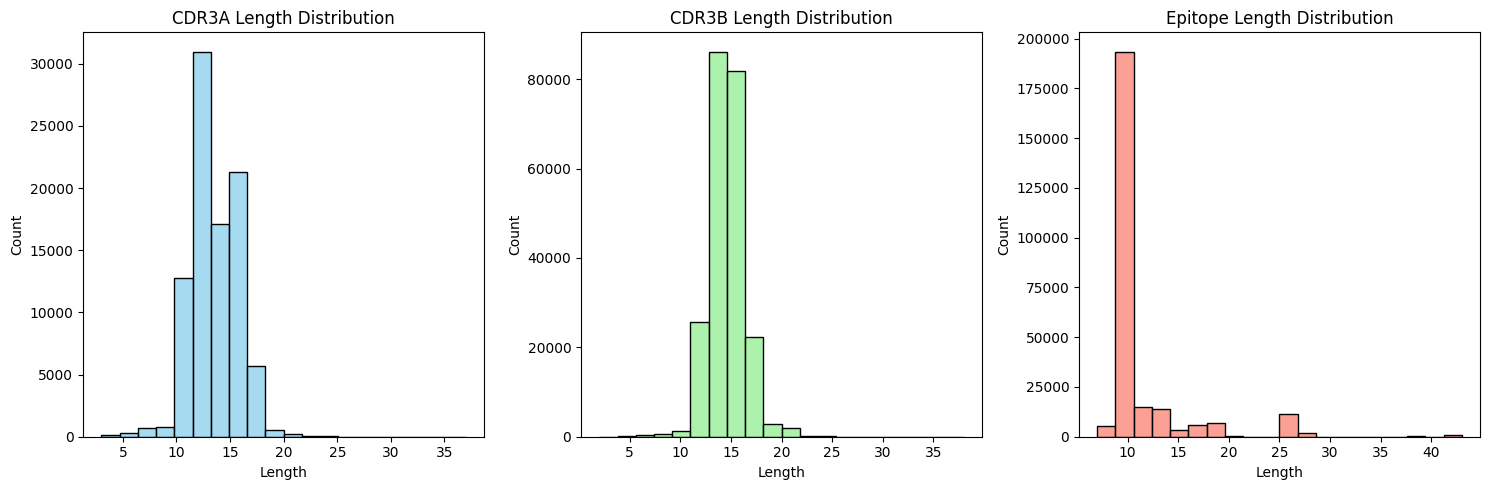

In [85]:
# frequency plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms
sns.histplot(data=tcr_data, x='CDR3A_length', ax=ax1, bins=20, color='skyblue')
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Count')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen')
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Count')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon')
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

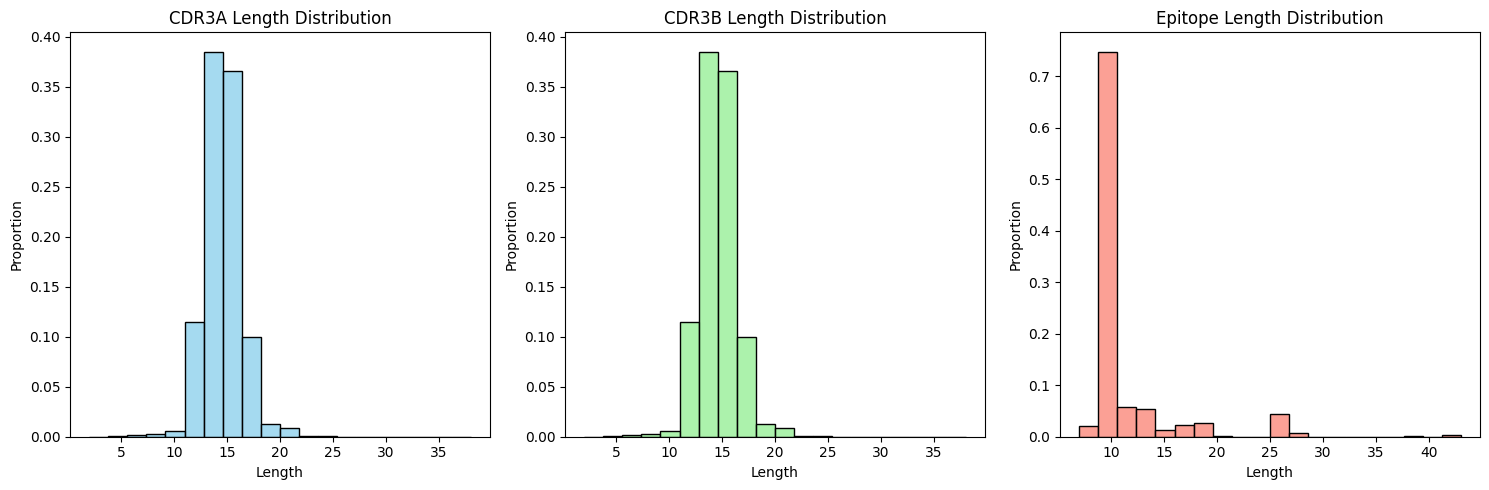

In [86]:
# propotion plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with proportions
sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax1, bins=20, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon', stat="proportion")
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Check unique values

In [87]:
print( 'CDR3A',tcr_data['CDR3A'].nunique())
print( 'CDR3B',tcr_data['CDR3B'].nunique())
print( 'epitope',tcr_data['epitope'].nunique())

CDR3A 48181
CDR3B 156671
epitope 2108


CDR3A - unique sequences: 48181
Total sequences: 258507 Unique sequences: 48181

CDR3B - unique sequences: 156671
Total sequences: 258507 Unique sequences: 156671

Epitopes - unique sequences: 2108
Total sequences: 258507 Unique sequences: 2108


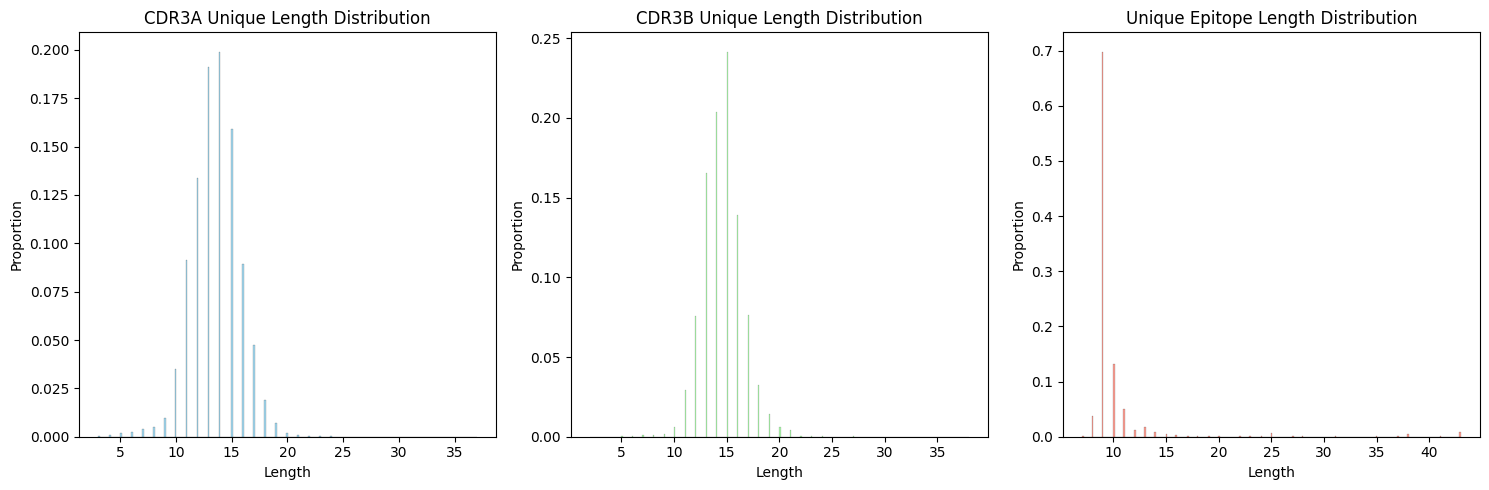

In [88]:
# Get unique sequences and their lengths
unique_cdr3a = tcr_data[['CDR3A', 'CDR3A_length']].dropna().drop_duplicates()
unique_cdr3b = tcr_data[['CDR3B', 'CDR3B_length']].dropna().drop_duplicates()
unique_epitopes = tcr_data[['epitope', 'epitope_length']].dropna().drop_duplicates()

# Print statistics
print("CDR3A - unique sequences:", tcr_data['CDR3A'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3a))

print("\nCDR3B - unique sequences:", tcr_data['CDR3B'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3b))

print("\nEpitopes - unique sequences:", tcr_data['epitope'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_epitopes))

# Create plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for unique sequences
sns.histplot(data=unique_cdr3a, x='CDR3A_length', ax=ax1, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Unique Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=unique_cdr3b, x='CDR3B_length', ax=ax2, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Unique Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=unique_epitopes, x='epitope_length', ax=ax3, color='salmon', stat="proportion")
ax3.set_title('Unique Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

## Check Studies

In [89]:
print( 'Studies',tcr_data['Studies'].nunique())

Studies 1064


Potential studies for validation:

- PMID:38039963
    - Phenotypic signatures of circulating neoantigenreactive CD8+ T cells in patients with metastatic cancers
    - has 14 epitopes and 45 TCRs

- PMID:27959684
    - T-Cell Transfer Therapy Targeting Mutant KRAS in Cancer
    - has 1 epitope and 5 TCRs

- PMID:32461371
    - High-affinity oligoclonal TCRs define effective adoptive T cell therapy targeting mutant KRAS-G12D
    - has 2 epitopes and 4 TCRs




# Split

In [90]:
# remove validation studies
validation_studies = ['PMID:38039963', 'PMID:27959684', 'PMID:32461371']
study_pattern = '|'.join(validation_studies)

#tcr_data_validate = tcr_data[ tcr_data['Studies'].isin(validation_studies)] # need to do str match for multiple studies
tcr_data_validate = tcr_data[tcr_data['Studies'].str.contains(study_pattern, na=False)]

#tcr_data_train = tcr_data[ ~tcr_data['Studies'].isin(validation_studies)]
tcr_data_train = tcr_data[~tcr_data['Studies'].str.contains(study_pattern, na=False)]

print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Validate')
print('epitopes:', tcr_data_validate['epitope'].nunique())
print('alpha:', tcr_data_validate['CDR3A'].nunique())
print('beta:', tcr_data_validate['CDR3B'].nunique())


Training
epitopes: 2094
alpha: 48141
beta: 156630 

Validate
epitopes: 15
alpha: 44
beta: 47


In [91]:
# check if validation epitopes are in train

validation_epitopes = tcr_data_validate['epitope'].unique()
print(validation_epitopes)
print( len(validation_epitopes))

#leaking_epitopes = tcr_data_train[ tcr_data_train['epitope'].isin(validation_epitopes)]

epitope_pattern = '|'.join(validation_epitopes)
leaking_epitopes = tcr_data_train[tcr_data_train['epitope'].str.contains(epitope_pattern, na=False)]

print('leaking epitopes:', len(leaking_epitopes))
print( leaking_epitopes['epitope'], '\n')

# remove leaking epitopes in train
tcr_data_train = tcr_data_train[~tcr_data_train['epitope'].str.contains(epitope_pattern, na=False)]
tcr_data_train

# add leaking epitopes to validate
tcr_data_validate = pd.concat([tcr_data_validate, leaking_epitopes])

print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Validate')
print('epitopes:', tcr_data_validate['epitope'].nunique())
print('alpha:', tcr_data_validate['CDR3A'].nunique())
print('beta:', tcr_data_validate['CDR3B'].nunique())

['VLVIASTDVDKTAASYYGEQTLHYI' 'SEQTFLIGL' 'RGSTDNLMDDIEMAVDDGVNTFKVL'
 'NENLDLKEL' 'NENLDLQEL' 'INPVVHPHGHIFTVYTDVQQVASSL' 'GADGVGKSA'
 'NLWPVTHGL' 'DLYHLIKKAVAVQKHLERNRKDKDA' 'GADGVGKSAL'
 'ATDALKNRSSVEARMEFVRQALAYL' 'TRLRKQALQDTLVLYKMFSEADACE'
 'YWNQGYGYQQGYEPGYGGYDYSPYG' 'TEFFPFYAL' 'RKAMEAVAAQGKTKK']
15
leaking epitopes: 3
82383                   GADGVGKSAL
181408                  GADGVGKSAL
237149    MTEYKLVVVGADGVGKSALTIQLI
Name: epitope, dtype: object 

Training
epitopes: 2092
alpha: 48140
beta: 156629 

Validate
epitopes: 16
alpha: 44
beta: 47


In [92]:
# remove additional 10% of epitopes
all_epitopes = tcr_data_train[['epitope', 'epitope_length']].drop_duplicates()
print(tcr_data_train['epitope'].nunique())

validation_random_epitopes = all_epitopes.sample( round(len(all_epitopes)*0.1 ), random_state=27)
print(validation_random_epitopes['epitope'].nunique())
# validation_random_epitopes['epitope'].nunique() # not sure why has 193

tcr_data_validate_random = tcr_data_train[ tcr_data_train['epitope'].isin(validation_random_epitopes['epitope'])]

assert tcr_data_validate_random['epitope'].nunique() == 209
print(tcr_data_validate_random['epitope'].nunique())

tcr_data_train = tcr_data_train[ ~tcr_data_train['epitope'].isin(validation_random_epitopes['epitope'])]


2092
209
209


In [93]:
print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Random Validate')
print('epitopes:', tcr_data_validate_random['epitope'].nunique())
print('alpha:', tcr_data_validate_random['CDR3A'].nunique())
print('beta:', tcr_data_validate_random['CDR3B'].nunique(), '\n')

print('Validate')
print('epitopes:', tcr_data_validate['epitope'].nunique())
print('alpha:', tcr_data_validate['CDR3A'].nunique())
print('beta:', tcr_data_validate['CDR3B'].nunique())

Training
epitopes: 1883
alpha: 46421
beta: 139785 

Random Validate
epitopes: 209
alpha: 2403
beta: 18352 

Validate
epitopes: 16
alpha: 44
beta: 47


# Filtering

In [94]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

tcr_data_train_unfiltered = tcr_data_train.copy()

epitopes: 1883
alpha: 46421
beta: 139785


In [95]:
# Matt found paper supporting epitopes between 8-13 (PMID:26783342 )
num_pre_filter = tcr_data_train['epitope'].nunique()
print('pre length filter:', num_pre_filter)

# filter any epitopes 13 or longer
tcr_data_train = tcr_data_train[ tcr_data_train['epitope_length'] < 14 ].copy()

# filter any less than 8
tcr_data_train = tcr_data_train[ tcr_data_train['epitope_length'] > 7 ]

num_post_filter = tcr_data_train['epitope'].nunique()
print('post length filter:', num_post_filter)
print('removed:', num_pre_filter - num_post_filter)


pre length filter: 1883
post length filter: 1793
removed: 90


In [96]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

epitopes: 1793
alpha: 46414
beta: 109493


In [97]:
# filter CDR3A
mean = tcr_data_train['CDR3A_length'].mean()
std = tcr_data_train['CDR3A_length'].std()
lower_bound = round(mean - 2*std)
upper_bound = round(mean + 2*std)
print('mean: ', mean)
print('std: ', std)
print('LB: ', lower_bound)
print('UB: ', upper_bound)

num_pre_filter = tcr_data_train['CDR3A'].nunique()
print('pre length filter:', num_pre_filter)

# filter
tcr_data_train = tcr_data_train[
    (tcr_data_train['CDR3A_length'].isna()) |  # ignore NA values
    (tcr_data_train['CDR3A_length'] >= lower_bound) & 
    (tcr_data_train['CDR3A_length'] <= upper_bound)
]

num_post_filter = tcr_data_train['CDR3A'].nunique()
print('post length filter:', num_post_filter)
print('removed:', num_pre_filter - num_post_filter)

mean:  13.504730150672604
std:  2.1012247457928215
LB:  9
UB:  18
pre length filter: 46414
post length filter: 45257
removed: 1157


In [98]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

epitopes: 1773
alpha: 45257
beta: 109101


In [99]:
# filter CDR3B
mean = tcr_data_train['CDR3B_length'].mean()
std = tcr_data_train['CDR3B_length'].std()
lower_bound = round(mean - 2*std)
upper_bound = round(mean + 2*std)
print('mean: ', mean)
print('std: ', std)
print('LB: ', lower_bound)
print('UB: ', upper_bound)

num_pre_filter = tcr_data_train['CDR3B'].nunique()
print('pre length filter:', num_pre_filter)

# filter
tcr_data_train = tcr_data_train[
    (tcr_data_train['CDR3B_length'].isna()) |  # ignore NA values
    (tcr_data_train['CDR3B_length'] >= lower_bound) & 
    (tcr_data_train['CDR3B_length'] <= upper_bound)
]

num_post_filter = tcr_data_train['CDR3B'].nunique()
print('post length filter:', num_post_filter)
print('removed:', num_pre_filter - num_post_filter)

mean:  14.442906635246118
std:  1.931772916523878
LB:  11
UB:  18
pre length filter: 109101
post length filter: 104843
removed: 4258


In [100]:
paired_data = tcr_data_train[['CDR3A', 'CDR3B', 'epitope']].dropna()
#paired_data

# check how many paired we have
print('epitopes:', paired_data['epitope'].nunique())
print('alpha:', paired_data['CDR3A'].nunique())
print('beta:', paired_data['CDR3B'].nunique())

epitopes: 1334
alpha: 23087
beta: 24899


# Chunk amino acids

In [101]:
# select 5 amino acids for CDR3 and epitope

def get_middle_five_left(aa_string):
    if pd.isna(aa_string):  # Check for NaN/null values
        return aa_string
    length = len(aa_string)
    
    if( length % 2 == 0 ):
            mid = length // 2 # integer division will ensure that doesnt matter if even or odd - it is floor so always rounds down
            start = mid - 3
            end = mid + 2
    else:
            mid = length // 2
            start = mid - 2
            end = mid + 3

    return aa_string[start:end]

tcr_data_train['CDR3A_middle_left'] = tcr_data_train['CDR3A'].apply(get_middle_five_left)
tcr_data_train['CDR3B_middle_left'] = tcr_data_train['CDR3B'].apply(get_middle_five_left)
tcr_data_train['epitope_middle_left'] = tcr_data_train['epitope'].apply(get_middle_five_left)

In [102]:
def get_middle_five_right(aa_string):
    if pd.isna(aa_string):  # Check for NaN/null values
        return aa_string
    length = len(aa_string)
    
    if( length % 2 == 0 ):
            mid = length // 2 # integer division will ensure that doesnt matter if even or odd - it is floor so always rounds down
            start = mid - 2
            end = mid + 3
    else:
            mid = length // 2
            start = mid - 2
            end = mid + 3

    return aa_string[start:end]

tcr_data_train['CDR3A_middle_right'] = tcr_data_train['CDR3A'].apply(get_middle_five_right)
tcr_data_train['CDR3B_middle_right'] = tcr_data_train['CDR3B'].apply(get_middle_five_right)
tcr_data_train['epitope_middle_right'] = tcr_data_train['epitope'].apply(get_middle_five_right)

In [108]:
split_types = ['left', 'right']
regions_to_test = ['CDR3A', 'CDR3B', 'epitope']
splits_to_make = []
for region in regions_to_test:
    best_score = -np.inf
    best_split_type = ''
    for split in split_types:
        richness = len(tcr_data_train[f'{region}_middle_{split}'].dropna(inplace=False).unique())
        print(region, split, richness)
        if richness > best_score:
            best_score = richness
            best_split_type = split
        splits_to_make.append(best_split_type)

CDR3A left 18664
CDR3A right 14700
CDR3B left 64976
CDR3B right 61618
epitope left 1543
epitope right 1547


In [109]:
tcr_data_train['CDR3A_middle'] = tcr_data_train['CDR3A_middle_left']
tcr_data_train['CDR3B_middle'] = tcr_data_train['CDR3B_middle_left']
tcr_data_train['epitope_middle'] = tcr_data_train['epitope_middle_right']

# Save

In [111]:
tcr_data_save = tcr_data_train[['CDR3A_middle', 'CDR3B_middle', 'epitope_middle']]
tcr_data_save.to_csv('/Volumes/ritd-ag-project-rd0017-bmcha43/CRUK_datathon_2025/processed_data/train.csv')